<a href="https://colab.research.google.com/github/lee7py/2021-py-DNN/blob/main/code/7-1%20cifar10_basic_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR-10 기본 ANN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
 
cifar10 = datasets.cifar10 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
 
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
 
print("Train samples:", train_images.shape, train_labels.shape)
print("Test samples:", test_images.shape, test_labels.shape)

170500096/170498071 [==============================] - 4s 0us/step
Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


In [ ]:
print(train_images.shape)
train_images[0]

(50000, 32, 32, 3)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
print(train_labels.shape)
train_labels

(50000, 1)


array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

(32, 32, 3)


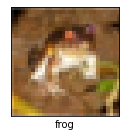

In [ ]:
import matplotlib.pyplot as plt

print(train_images[0].shape)
plt.figure(figsize=(2, 2))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(train_images[0])
plt.xlabel(class_names[train_labels[0][0]])
plt.show()

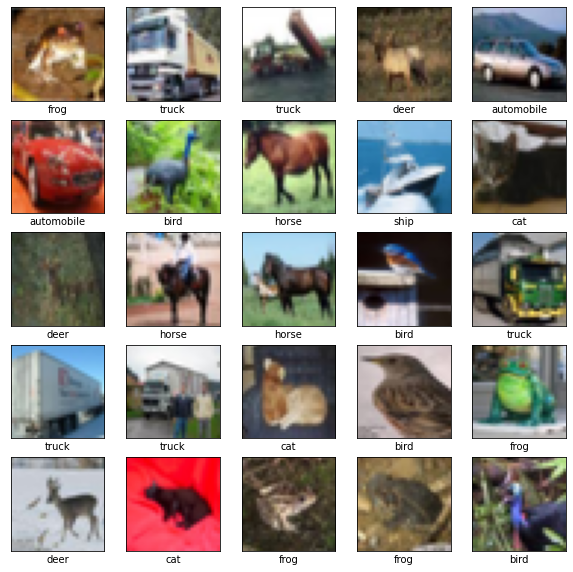

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()
 
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=30)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/30
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8777 - accuracy: 0.3211
Epoch 2/30
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6921 - accuracy: 0.3945
Epoch 3/30
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6062 - accuracy: 0.4216
Epoch 4/30
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5551 - accuracy: 0.4408
Epoch 5/30
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5150 - accuracy: 0.4569
Epoch 6/30
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4895 - accuracy: 0.4665
Epoch 7/30
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4634 - accuracy: 0.4756
Epoch 8/30
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4386 - accuracy: 0.4861
Epoch 9/30
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4226 - accuracy: 0.4900
Epoch 10/30
1563/1563 [==============================] - 4s 2ms/step - loss: 1.404

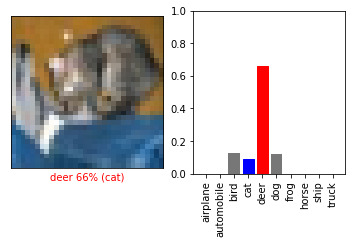

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label[0]]),
                                color=color)
 
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

    # 각 종류 레이블을 직접 세로로 출력
    xlabel = [class_names[i] for i in range(10)]
    plt.xticks(np.arange(10), xlabel, rotation='vertical')

predictions = model.predict(test_images)
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

# CIFAR-10 CNN

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


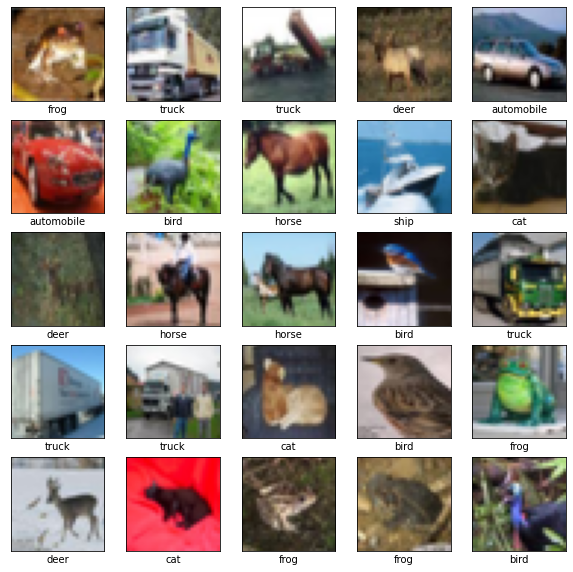

Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5123 - accuracy: 0.4506
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1527 - accuracy: 0.5908
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9847 - accuracy: 0.6538
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8901 - accuracy: 0.6874
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8118 - accuracy: 0.7147
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7574 - accuracy: 0.7348
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7098 - accuracy: 0.7498
Epoch 8/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6576 - accuracy: 0.7693
Epoch 9/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6192 - accuracy: 0.7828
Epoch 10/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.578

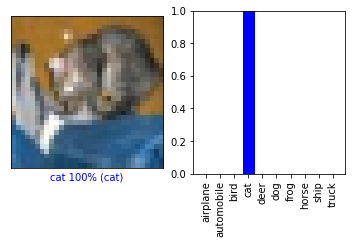

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
 
cifar10 = datasets.cifar10 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
 
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
 
print("Train samples:", train_images.shape, train_labels.shape)
print("Test samples:", test_images.shape, test_labels.shape)
 
#train_images = train_images.reshape((50000, 32, 32, 3))
#test_images = test_images.reshape((10000, 32, 32, 3))
 
 
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()
 
train_images = train_images/255.0
test_images = test_images/255.0
 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 
model.fit(train_images, train_labels, epochs=50)
 
test_loss, test_acc = model.evaluate(test_images, test_labels)
 
print('Test accuracy:', test_acc)
 
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label[0]]),
                                color=color)
 
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    #plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

    # 각 종류 레이블을 직접 세로로 출력
    xlabel = [class_names[i] for i in range(10)]
    plt.xticks(np.arange(10), xlabel, rotation='vertical')

predictions = model.predict(test_images)
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
 
cifar100 = datasets.cifar100 
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

(32, 32, 3)


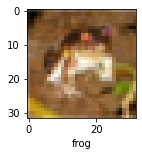

In [ ]:
import matplotlib.pyplot as plt

print(train_images[0].shape)
plt.figure(figsize=(2, 2))
#plt.xticks([])
#plt.yticks([])
plt.grid(False)
plt.imshow(train_images[0])
plt.xlabel(class_names[train_labels[0][0]])
plt.show()

In [ ]:
import keras
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import random


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(type(x_test))
print(type(y_test[0]))

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
CIFAR100_LABELS_LIST = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

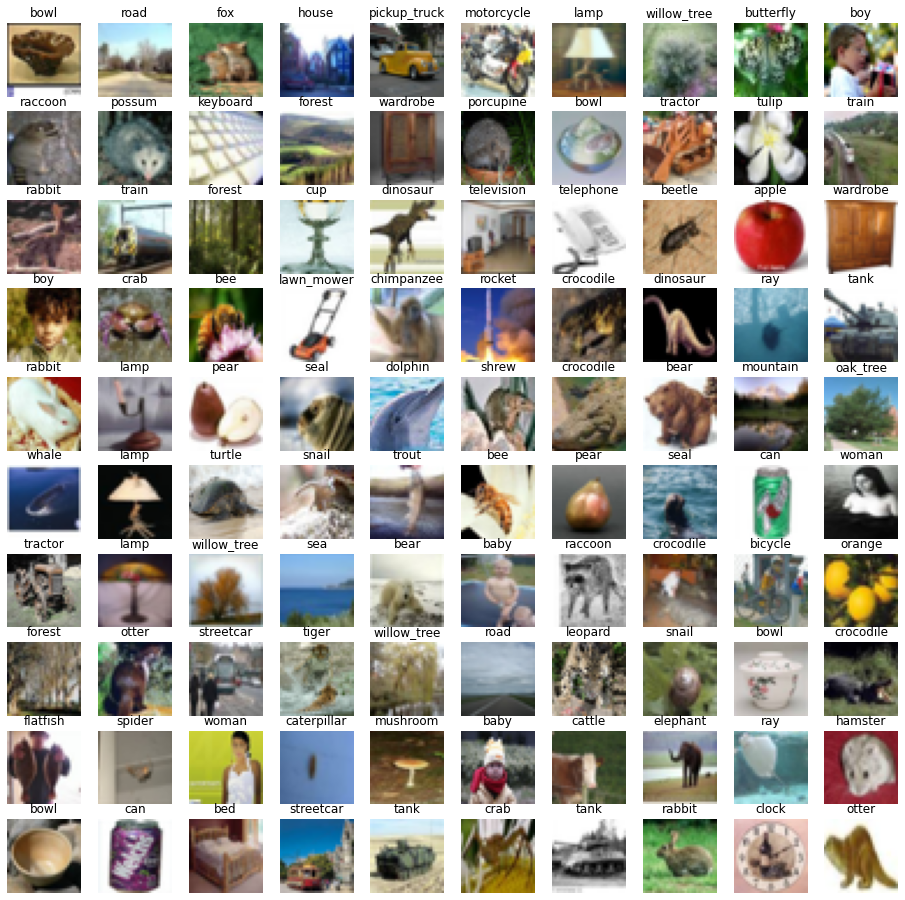

In [ ]:
pos = 1
#index = 0
index = random.randint(0, x_test.shape[0]/2)
i = index


# plt figure set to 16inch x 16inch(1600pixel x 1600 pixel). 
plt.figure(figsize=(16,16))

# draw cifar100 images and label names
for img in x_test[index:index+100]:
    plt.subplot(10, 10, pos)
    plt.imshow(img)
    plt.axis('off')
    plt.title(CIFAR100_LABELS_LIST[y_test[i][0]])
    pos += 1
    i += 1

plt.show()

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


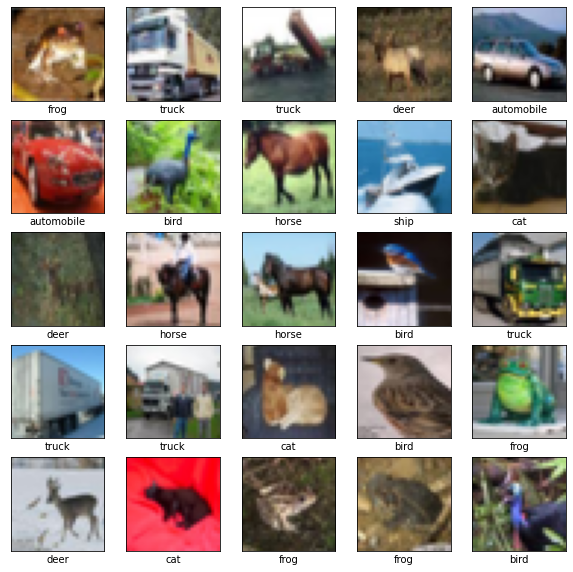

Epoch 1/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.7519 - accuracy: 0.3480 - val_loss: 1.3433 - val_accuracy: 0.5072
Epoch 2/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.3572 - accuracy: 0.5099 - val_loss: 1.1550 - val_accuracy: 0.5828
Epoch 3/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.2319 - accuracy: 0.5605 - val_loss: 1.1085 - val_accuracy: 0.6099
Epoch 4/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.1392 - accuracy: 0.5989 - val_loss: 0.9679 - val_accuracy: 0.6592
Epoch 5/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.0730 - accuracy: 0.6224 - val_loss: 0.9015 - val_accuracy: 0.6859
Epoch 6/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.0184 - accuracy: 0.6448 - val_loss: 0.9115 - val_accuracy: 0.6840
Epoch 7/50
1250/1250 [==============================] - 10s 8ms/step - loss: 0.9786 - accuracy: 0.6601 - val_loss: 0.8595 - val_ac

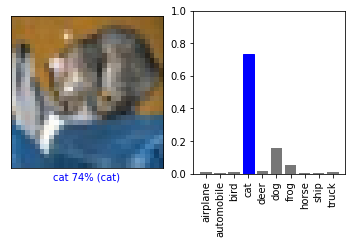

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
 
cifar10 = datasets.cifar10 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
 
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
 
print("Train samples:", train_images.shape, train_labels.shape)
print("Test samples:", test_images.shape, test_labels.shape)
 
#train_images = train_images.reshape((50000, 32, 32, 3))
#test_images = test_images.reshape((10000, 32, 32, 3))
 
 
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()
 
train_images = train_images/255.0
test_images = test_images/255.0
 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='SAME', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='SAME'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='SAME'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='valid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 
model.fit(train_images, train_labels, epochs=50, validation_split=.2)
 
test_loss, test_acc = model.evaluate(test_images, test_labels)
 
print('Test accuracy:', test_acc)
 
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label[0]]),
                                color=color)
 
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    #plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

    # 각 종류 레이블을 직접 세로로 출력
    xlabel = [class_names[i] for i in range(10)]
    plt.xticks(np.arange(10), xlabel, rotation='vertical')

predictions = model.predict(test_images)
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()